In [1]:
import os
from datetime import datetime

# Define the target directory (change yours)
TARGET_DIRECTORY = r"C:\Users\pablosal\Desktop\gbb-ai-upgrade"

# Check if the directory exists
if os.path.exists(TARGET_DIRECTORY):
    # Change the current working directory
    os.chdir(TARGET_DIRECTORY)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {TARGET_DIRECTORY} does not exist.")

Directory C:\Users\pablosal\Desktop\gbb-ai-upgrade does not exist.


In [2]:
from src.performance.latencytest import AzureOpenAIBenchmarkStreaming, AzureOpenAIBenchmarkNonStreaming

In [3]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Now you can access the environment variables using os.getenv
OPENAI_API_KEY = os.getenv("AZURE_OPENAI_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_API_ENDPOINT")
DEPLOYMENT_ID = os.getenv("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID")
DEPLOYMENT_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")

In [4]:
benchmark_streaming = AzureOpenAIBenchmarkStreaming(api_key=OPENAI_API_KEY, 
                                                    azure_endpoint=AZURE_OPENAI_ENDPOINT, 
                                                    api_version=DEPLOYMENT_VERSION)

benchmark_non_streaming = AzureOpenAIBenchmarkNonStreaming(api_key=OPENAI_API_KEY, 
                                                    azure_endpoint=AZURE_OPENAI_ENDPOINT, 
                                                    api_version=DEPLOYMENT_VERSION)

In [5]:
await benchmark_streaming.run_latency_benchmark_bulk(deployment_names=[DEPLOYMENT_ID], max_tokens_list=[100, 150, 250], iterations=5)

2024-06-29 23:54:21,590 - micro - MainProcess - INFO     CPU usage: 13.7% (utils.py:log_system_info:233)
2024-06-29 23:54:21,601 - micro - MainProcess - INFO     RAM usage: 85.9% (utils.py:log_system_info:235)
2024-06-29 23:54:21,620 - micro - MainProcess - INFO     As no context was provided, 1000 tokens were added as average workloads. (latencytest.py:make_call:807)
2024-06-29 23:54:21,627 - micro - MainProcess - INFO     Fuzzy match found: 'gpt-4o-2024-05-13' matched to 'gpt-4' with a score of 90. (utils.py:detect_model_encoding:76)
2024-06-29 23:54:22,117 - micro - MainProcess - INFO     Messages: [{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': '1719723262.1172395 snuck pathetic origin maintenance tugboat reader acquaintance decorous theme weather rubber wrapping property brown neck species democracy ark placid greatness supplier population weapon pacemaker mushroom hormone rustic vigorous barn cleric dude bush smash prospect primate serv

In [8]:
await benchmark_non_streaming.run_latency_benchmark_bulk(deployment_names=[DEPLOYMENT_ID], max_tokens_list=[100, 150, 250], iterations=5)

2024-06-29 23:55:29,416 - micro - MainProcess - INFO     CPU usage: 12.9% (utils.py:log_system_info:233)
INFO:micro:CPU usage: 12.9%
2024-06-29 23:55:29,430 - micro - MainProcess - INFO     RAM usage: 86.2% (utils.py:log_system_info:235)
INFO:micro:RAM usage: 86.2%
2024-06-29 23:55:29,451 - micro - MainProcess - INFO     Fuzzy match found: 'gpt-4o-2024-05-13' matched to 'gpt-4' with a score of 90. (utils.py:detect_model_encoding:76)
INFO:micro:Fuzzy match found: 'gpt-4o-2024-05-13' matched to 'gpt-4' with a score of 90.
2024-06-29 23:55:29,456 - micro - MainProcess - INFO     As no context was provided, 1000 tokens were added as average workloads. (latencytest.py:generate_test_messages:649)
INFO:micro:As no context was provided, 1000 tokens were added as average workloads.
2024-06-29 23:55:29,554 - micro - MainProcess - INFO     Initiating call for Model: gpt-4o-2024-05-13, Max Tokens: 100 (latencytest.py:make_call:740)
INFO:micro:Initiating call for Model: gpt-4o-2024-05-13, Max Token

In [9]:
from src.performance.latencyanalyzer import BenchmarkVisualizer

In [10]:
results = [benchmark_streaming.results, benchmark_non_streaming.results]

In [15]:
results_2 = {}
for result in results:
    results_2.update(result)

In [16]:
results_2

{'gpt-4o-2024-05-13_100': {'ttlt_successfull': [2.0491758999999945,
   1.5677140000000094,
   4.567109500000001,
   1.7873945000000049,
   1.5684222999999946],
  'ttlt_unsucessfull': [],
  'tbt': [0.02, 0.02, 0.05, 0.02, 0.02],
  'ttft': [2.05, 1.57, 4.57, 1.79, 1.57],
  'regions': ['East US 2', 'East US 2', 'East US 2', 'East US 2', 'East US 2'],
  'number_of_iterations': 5,
  'completion_tokens': [100, 100, 100, 100, 100],
  'prompt_tokens': [981, 988, 971, 961, 974],
  'errors': {'count': 0, 'codes': []},
  'best_run': {'ttlt': 1.57,
   'completion_tokens': 100,
   'prompt_tokens': 974,
   'region': 'East US 2',
   'utilization': 'NA',
   'local_time': '2024-06-30 00:55:45 EDT'},
  'worst_run': {'ttlt': 4.57,
   'completion_tokens': 100,
   'prompt_tokens': 971,
   'region': 'East US 2',
   'utilization': 'NA',
   'local_time': '2024-06-30 00:55:40 EDT'}},
 'gpt-4o-2024-05-13_250': {'ttlt_successfull': [4.997364700000006,
   5.9118020999999885,
   3.1401520000000005,
   3.1020616999

In [13]:
results_2

{'gpt-4o-2024-05-13_100': ['ttlt_successfull',
  'ttlt_unsucessfull',
  'tbt',
  'ttft',
  'regions',
  'number_of_iterations',
  'completion_tokens',
  'prompt_tokens',
  'errors',
  'best_run',
  'worst_run',
  'ttlt_successfull',
  'ttlt_unsucessfull',
  'tbt',
  'ttft',
  'regions',
  'number_of_iterations',
  'completion_tokens',
  'prompt_tokens',
  'errors',
  'best_run',
  'worst_run'],
 'gpt-4o-2024-05-13_250': ['ttlt_successfull',
  'ttlt_unsucessfull',
  'tbt',
  'ttft',
  'regions',
  'number_of_iterations',
  'completion_tokens',
  'prompt_tokens',
  'errors',
  'best_run',
  'worst_run',
  'ttlt_successfull',
  'ttlt_unsucessfull',
  'tbt',
  'ttft',
  'regions',
  'number_of_iterations',
  'completion_tokens',
  'prompt_tokens',
  'errors',
  'best_run',
  'worst_run'],
 'gpt-4o-2024-05-13_150': ['ttlt_successfull',
  'ttlt_unsucessfull',
  'tbt',
  'ttft',
  'regions',
  'number_of_iterations',
  'completion_tokens',
  'prompt_tokens',
  'errors',
  'best_run',
  'worst

In [17]:
visualizer = BenchmarkVisualizer(results_2)

2024-06-29 23:58:08,114 - micro - MainProcess - INFO     DataFrame created successfully (latencyanalyzer.py:_create_dataframe:50)
INFO:micro:DataFrame created successfully
2024-06-29 23:58:08,119 - micro - MainProcess - INFO     Model DataFrames created successfully (latencyanalyzer.py:_create_model_dfs:67)
INFO:micro:Model DataFrames created successfully


In [18]:
visualizer.unique_model_names

array(['gpt-4o-2024-05-13'], dtype=object)

2024-06-29 23:58:13,964 - micro - MainProcess - INFO     Residuals calculated successfully (latencyanalyzer.py:_calculate_residuals:102)
INFO:micro:Residuals calculated successfully
2024-06-29 23:58:13,970 - micro - MainProcess - INFO     Top outliers identified successfully (latencyanalyzer.py:_identify_top_outliers:118)
INFO:micro:Top outliers identified successfully
2024-06-29 23:58:13,976 - micro - MainProcess - INFO     Correlation matrix calculated successfully (latencyanalyzer.py:_calculate_correlation_matrix:82)
INFO:micro:Correlation matrix calculated successfully
2024-06-29 23:58:14,213 - micro - MainProcess - INFO     Completion tokens plot created successfully for gpt-4o-2024-05-13 (latencyanalyzer.py:plot_completion_tokens:167)
INFO:micro:Completion tokens plot created successfully for gpt-4o-2024-05-13


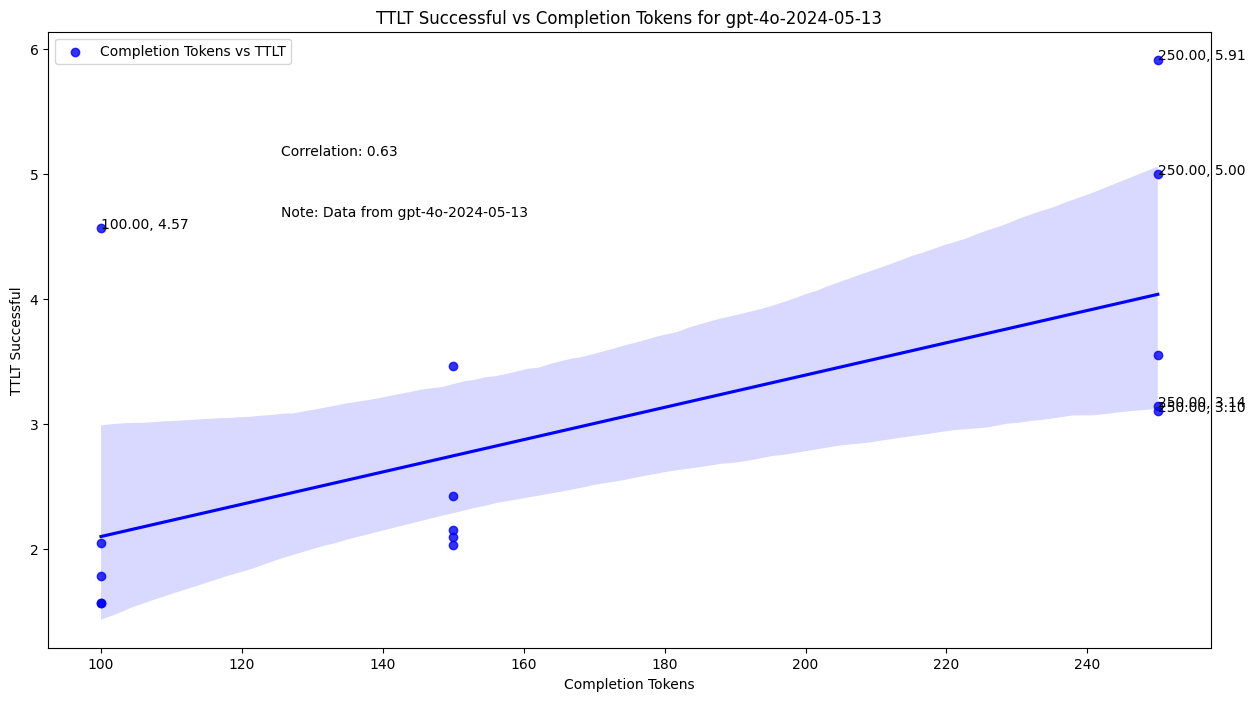

In [19]:
completion_tokens_plot = visualizer.plot_completion_tokens('gpt-4o-2024-05-13')
completion_tokens_plot.show()

2024-06-29 23:13:25,349 - micro - MainProcess - INFO     DataFrame created successfully (latencyanalyzer.py:_create_dataframe:45)
INFO:micro:DataFrame created successfully
2024-06-29 23:13:25,353 - micro - MainProcess - INFO     Model DataFrames created successfully (latencyanalyzer.py:_create_model_dfs:61)
INFO:micro:Model DataFrames created successfully
2024-06-29 23:13:25,359 - micro - MainProcess - INFO     Correlation matrix calculated successfully (latencyanalyzer.py:_calculate_correlation_matrix:75)
INFO:micro:Correlation matrix calculated successfully
2024-06-29 23:13:25,370 - micro - MainProcess - INFO     Residuals calculated successfully (latencyanalyzer.py:_calculate_residuals:92)
INFO:micro:Residuals calculated successfully
2024-06-29 23:13:25,373 - micro - MainProcess - INFO     Top outliers identified successfully (latencyanalyzer.py:_identify_top_outliers:106)
INFO:micro:Top outliers identified successfully
2024-06-29 23:13:25,517 - micro - MainProcess - INFO     Correl

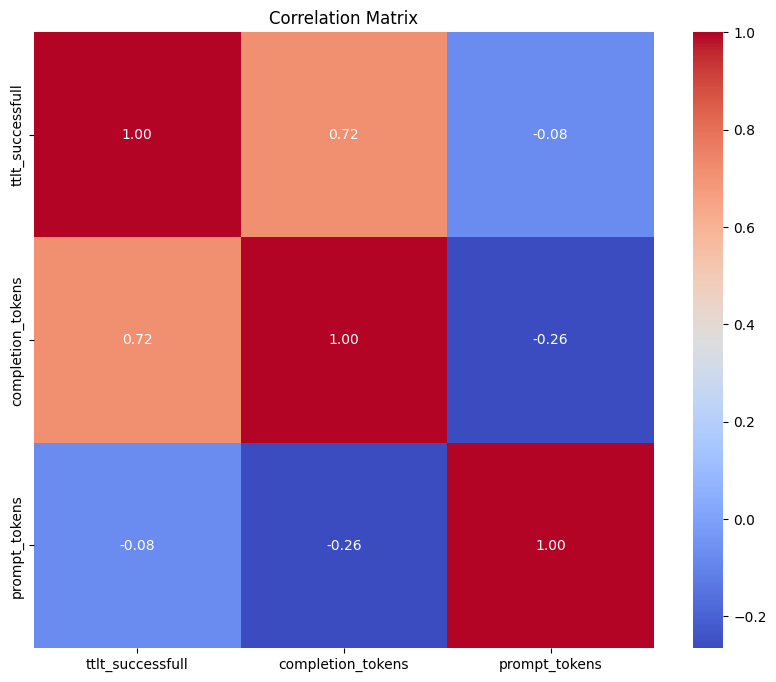

2024-06-29 23:13:25,901 - micro - MainProcess - INFO     Completion tokens plot created successfully (latencyanalyzer.py:plot_completion_tokens:146)
INFO:micro:Completion tokens plot created successfully


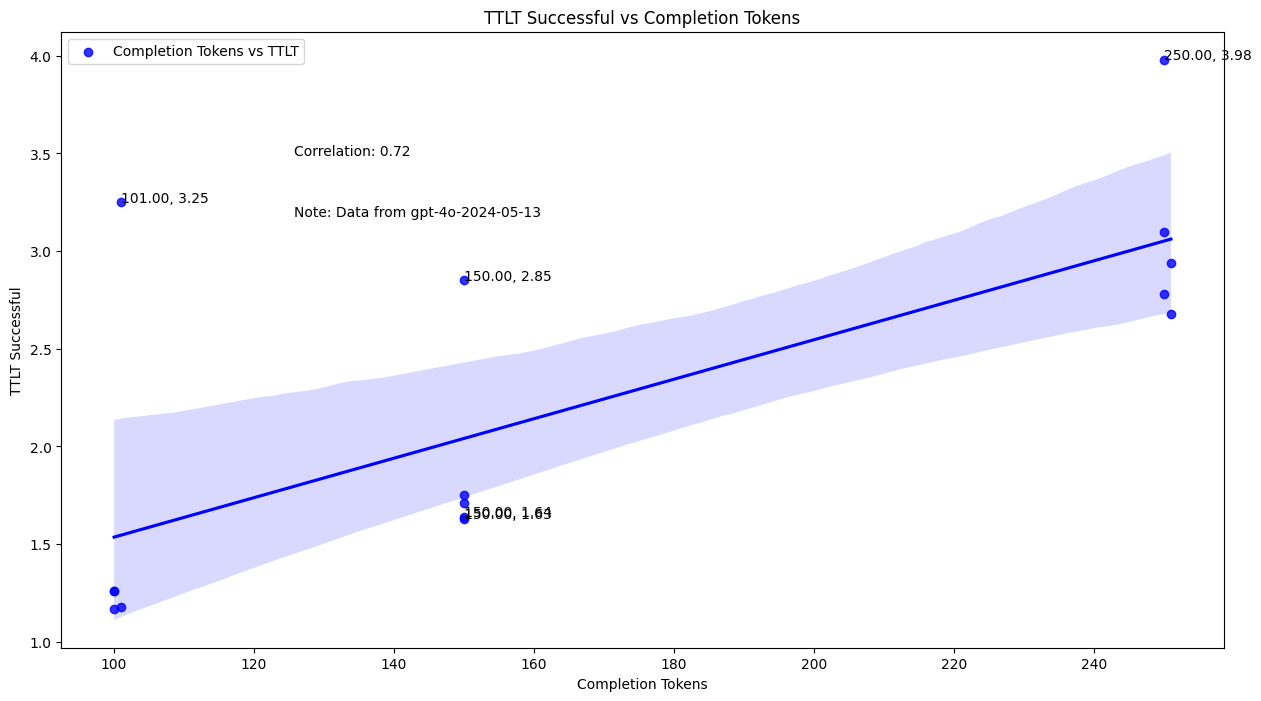

2024-06-29 23:13:26,289 - micro - MainProcess - INFO     Prompt tokens plot created successfully (latencyanalyzer.py:plot_prompt_tokens:170)
INFO:micro:Prompt tokens plot created successfully


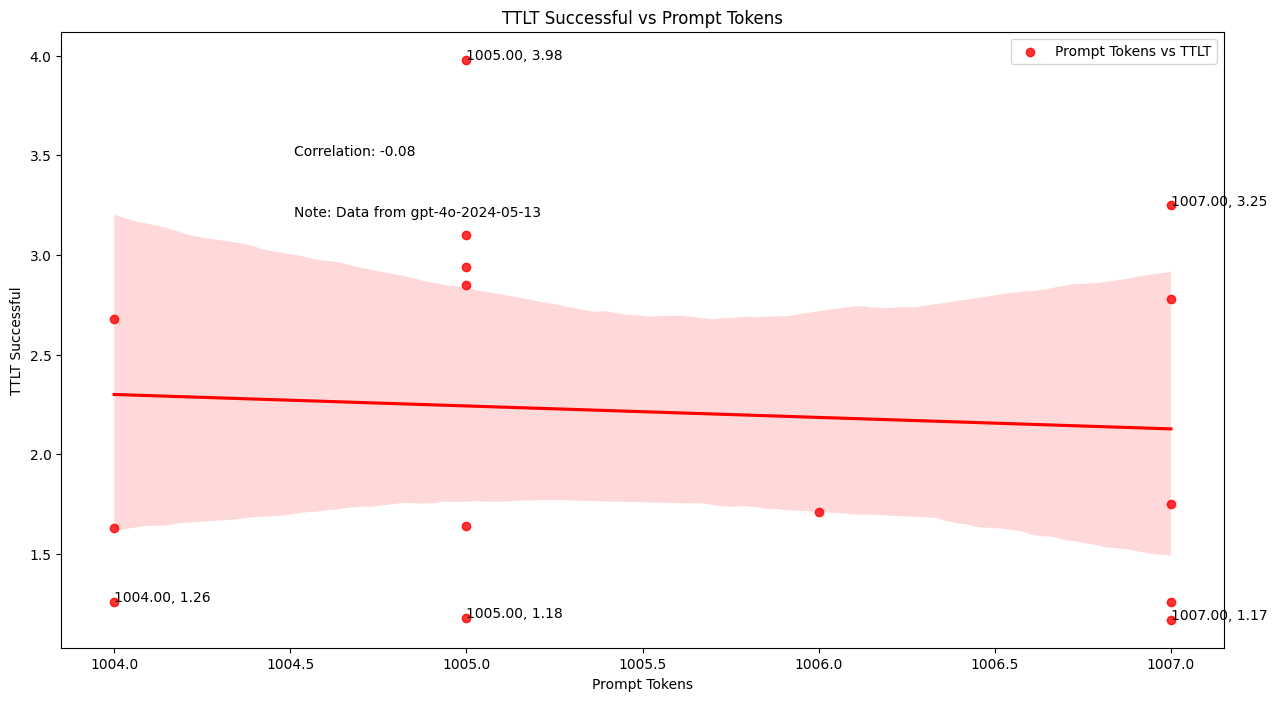

In [47]:
visualizer = BenchmarkVisualizer(benchmark_streaming.results)
correlation_matrix_plot = visualizer.plot_correlation_matrix()
correlation_matrix_plot.show()

completion_tokens_plot = visualizer.plot_completion_tokens()
completion_tokens_plot.show()

prompt_tokens_plot = visualizer.plot_prompt_tokens()
prompt_tokens_plot.show()

In [ ]:
# Usage Example
# benchmark_results = {...}  # Your dictionary here
# visualizer = BenchmarkVisualizer(benchmark_results)
# correlation_matrix_plot = visualizer.plot_correlation_matrix()
# correlation_matrix_plot.show()

# completion_tokens_plot = visualizer.plot_completion_tokens()
# completion_tokens_plot.show()

# prompt_tokens_plot = visualizer.plot_prompt_tokens()
# prompt_tokens_plot.show()

Top outliers for 'completion_tokens':


,model_name,tokens,ttlt_successfull,completion_tokens,prompt_tokens,Residuals Completion Tokens,Residuals Prompt Tokens
9,gpt-4o-2024-05-13,150,2.19,150,1006,-0.181816,0.495833
6,gpt-4o-2024-05-13,150,2.16,150,1006,-0.211816,0.465833
8,gpt-4o-2024-05-13,150,2.05,150,1007,-0.321816,-0.056250
7,gpt-4o-2024-05-13,150,2.01,150,1007,-0.361816,-0.096250
5,gpt-4o-2024-05-13,150,3.45,151,1009,1.057338,0.519583


Top outliers for 'prompt_tokens':


,model_name,tokens,ttlt_successfull,completion_tokens,prompt_tokens,Residuals Completion Tokens,Residuals Prompt Tokens
0,gpt-4o-2024-05-13,100,1.36,100,1006,0.030493,-0.334167
6,gpt-4o-2024-05-13,150,2.16,150,1006,-0.211816,0.465833
9,gpt-4o-2024-05-13,150,2.19,150,1006,-0.181816,0.495833
5,gpt-4o-2024-05-13,150,3.45,151,1009,1.057338,0.519583
1,gpt-4o-2024-05-13,100,1.34,101,1007,-0.010353,-0.766250


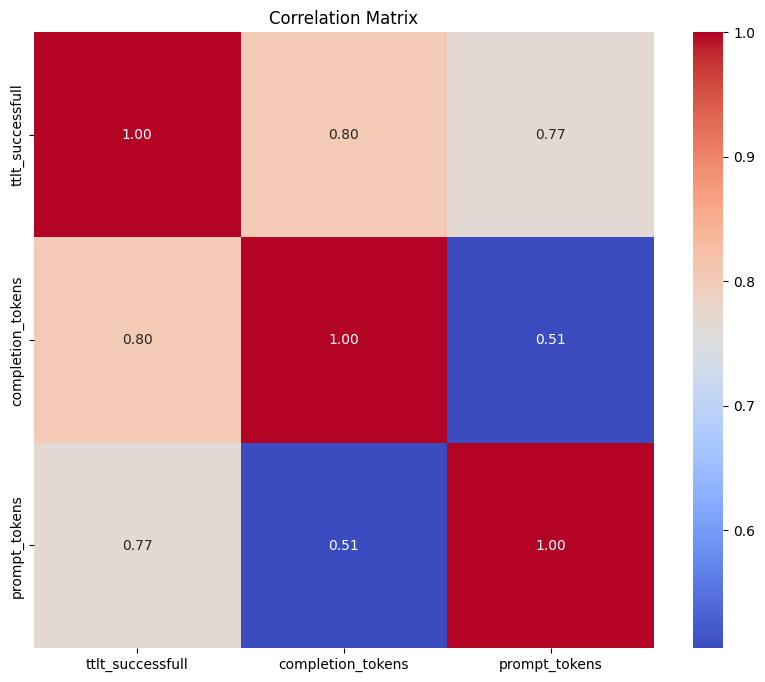

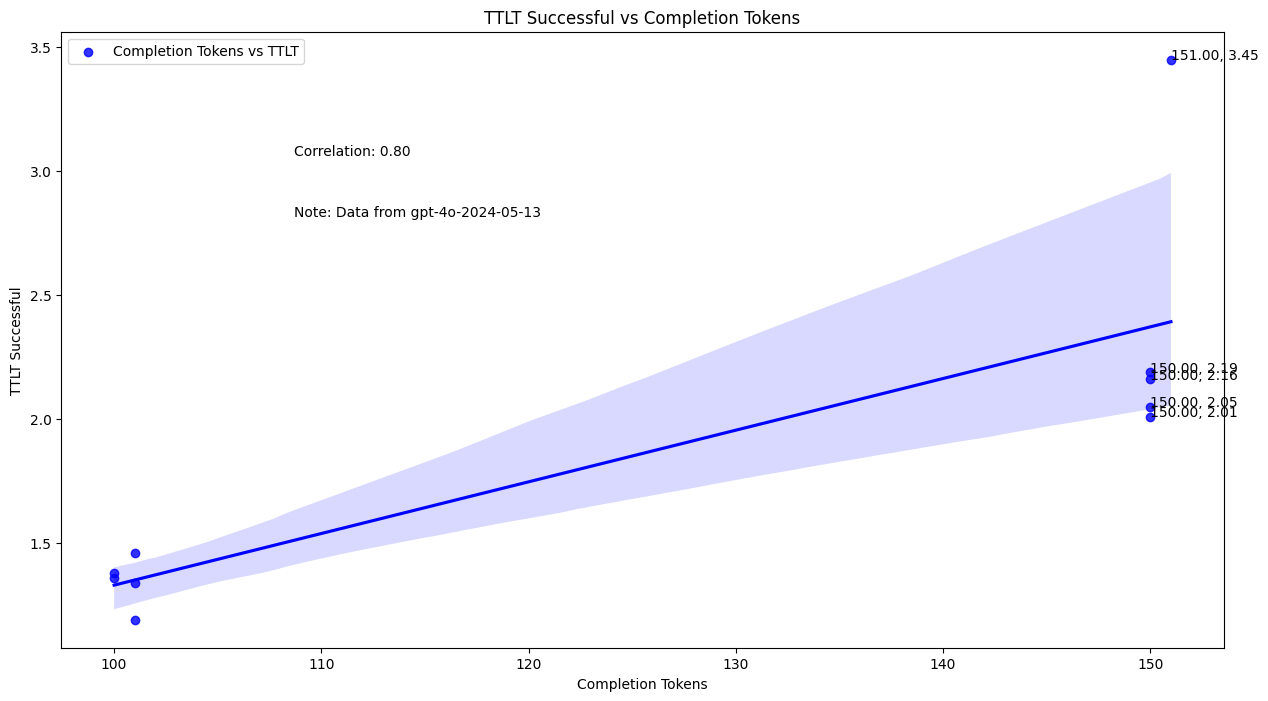

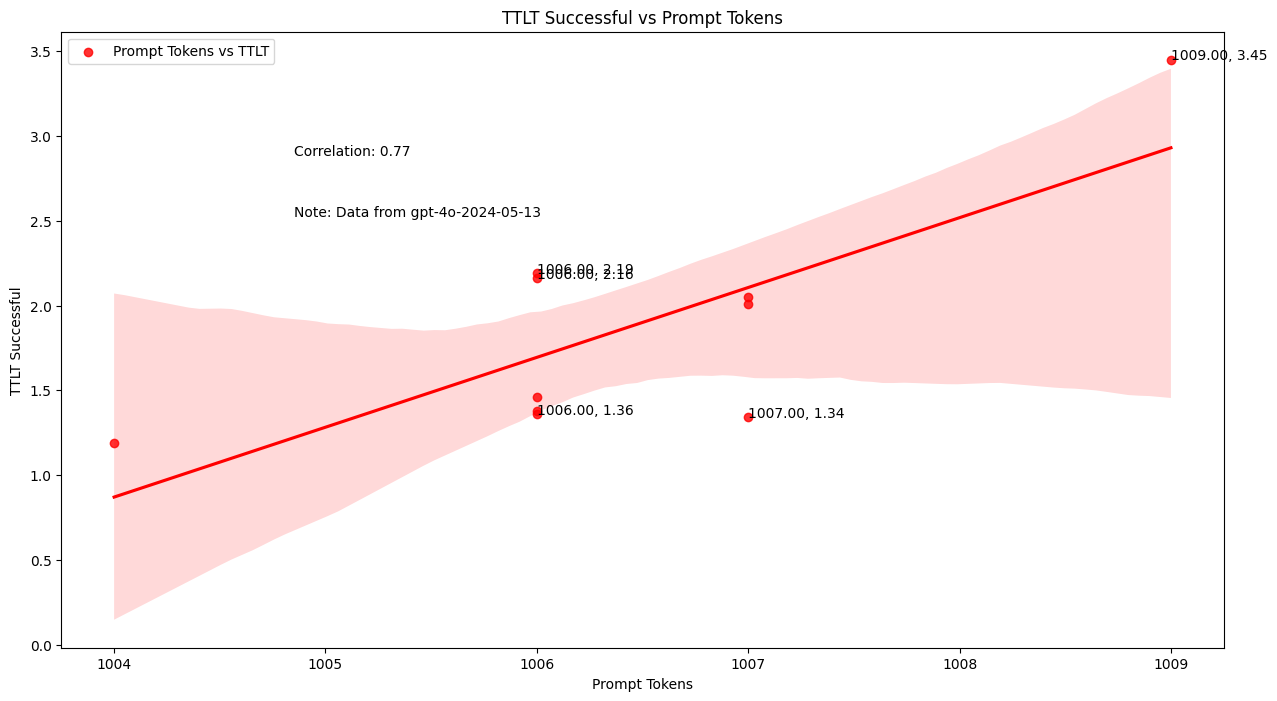

In [39]:
import pandas as pd

# Initialize an empty list to hold all data
all_data = []

# Extract model names and tokens, then populate the list with data
for key, value in benchmark_streaming.results.items():
    model_name, tokens = key.rsplit('_', 1)
    for i in range(len(next(iter(value.values())))):
        all_data.append({
            'model_name': model_name,
            'tokens': int(tokens),
            'ttlt_successfull': value['ttlt_successfull'][i],
            'completion_tokens': value['completion_tokens'][i],
            'prompt_tokens': value['prompt_tokens'][i]
        })

# Convert the list to a DataFrame
df = pd.DataFrame(all_data)

# Create a dictionary to hold each model's DataFrame
model_dfs = {}

# Iterate over each unique model name
for model_name in df['model_name'].unique():
    # Filter the main DataFrame for the current model and assign it to the dictionary
    model_dfs[model_name] = df[df['model_name'] == model_name]


# Perform analyses and visualizations
# Calculate correlation matrix
correlation_matrix = df[['ttlt_successfull', 'completion_tokens', 'prompt_tokens']].corr()

# Linear regression and residuals calculation for 'completion_tokens'
slope, intercept, r_value, p_value, std_err = stats.linregress(df['completion_tokens'], df['ttlt_successfull'])
df['Residuals Completion Tokens'] = df['ttlt_successfull'] - (slope * df['completion_tokens'] + intercept)

# Linear regression and residuals calculation for 'prompt_tokens'
slope, intercept, r_value, p_value, std_err = stats.linregress(df['prompt_tokens'], df['ttlt_successfull'])
df['Residuals Prompt Tokens'] = df['ttlt_successfull'] - (slope * df['prompt_tokens'] + intercept)

# Identify top outliers for both residuals
top_outliers_completion = df.iloc[np.abs(df['Residuals Completion Tokens']).argsort()[-5:]]
top_outliers_prompt = df.iloc[np.abs(df['Residuals Prompt Tokens']).argsort()[-5:]]

# Display top outliers
print("Top outliers for 'completion_tokens':")
display(top_outliers_completion)

print("Top outliers for 'prompt_tokens':")
display(top_outliers_prompt)

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visualization for 'completion_tokens'
plt.figure(figsize=(15, 8))
sns.regplot(x='completion_tokens', 
            y='ttlt_successfull', 
            data=df, color='blue', label='Completion Tokens vs TTLT')
for i in range(top_outliers_completion.shape[0]):
    plt.annotate(f"{top_outliers_completion.iloc[i]['completion_tokens']:.2f}, {top_outliers_completion.iloc[i]['ttlt_successfull']:.2f}", 
                 (top_outliers_completion.iloc[i]['completion_tokens'], top_outliers_completion.iloc[i]['ttlt_successfull']))
plt.xlabel('Completion Tokens')
plt.ylabel('TTLT Successful')
plt.title('TTLT Successful vs Completion Tokens')
plt.legend()
plt.text(0.2, 0.8, f"Correlation: {correlation_matrix.loc['completion_tokens', 'ttlt_successfull']:.2f}", transform=plt.gca().transAxes)
plt.text(0.2, 0.7, f"Note: Data from {df['model_name'][0]}", transform=plt.gca().transAxes)
plt.show()

# Visualization for 'prompt_tokens'
plt.figure(figsize=(15, 8))
sns.regplot(x='prompt_tokens', 
            y='ttlt_successfull', 
            data=df, color='red', label='Prompt Tokens vs TTLT')
for i in range(top_outliers_prompt.shape[0]):
    plt.annotate(f"{top_outliers_prompt.iloc[i]['prompt_tokens']:.2f}, {top_outliers_prompt.iloc[i]['ttlt_successfull']:.2f}", 
                 (top_outliers_prompt.iloc[i]['prompt_tokens'], top_outliers_prompt.iloc[i]['ttlt_successfull']))
plt.xlabel('Prompt Tokens')
plt.ylabel('TTLT Successful')
plt.title('TTLT Successful vs Prompt Tokens')
plt.legend()
plt.text(0.2, 0.8, f"Correlation: {correlation_matrix.loc['prompt_tokens', 'ttlt_successfull']:.2f}", transform=plt.gca().transAxes)
plt.text(0.2, 0.7, f"Note: Data from {df['model_name'][0]}", transform=plt.gca().transAxes)
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [20]:
correlation_matrix = df[['Average TTLT (s)', 'Median Completion Tokens', 'Median Prompt Tokens']].corr()

In [16]:
# Perform analyses and visualizations
# Calculate correlation matrix
correlation_matrix = df[['Average TTLT (s)', 'Median Completion Tokens', 'Median Prompt Tokens']].corr()

# Assuming 'time' column exists in df for min and max time calculation
min_time = df['time'].min() if 'time' in df.columns else "N/A"
max_time = df['time'].max() if 'time' in df.columns else "N/A"

# Linear regression and residuals calculation for 'Median Completion Tokens'
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Median Completion Tokens'], df['Average TTLT (s)'])
df['Residuals Completion Tokens'] = df['Average TTLT (s)'] - (slope * df['Median Completion Tokens'] + intercept)

# Linear regression and residuals calculation for 'Median Prompt Tokens'
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Median Prompt Tokens'], df['Average TTLT (s)'])
df['Residuals Prompt Tokens'] = df['Average TTLT (s)'] - (slope * df['Median Prompt Tokens'] + intercept)

# Identify top outliers for both residuals
top_outliers_completion = df.iloc[np.abs(df['Residuals Completion Tokens']).argsort()[-5:]]
top_outliers_prompt = df.iloc[np.abs(df['Residuals Prompt Tokens']).argsort()[-5:]]

# Display top outliers
print("Top outliers for 'Median Completion Tokens':")
display(top_outliers_completion)

print("Top outliers for 'Median Prompt Tokens':")
display(top_outliers_prompt)

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visualization for 'Median Completion Tokens'
plt.figure(figsize=(15, 8))
sns.regplot(x='Median Completion Tokens', 
            y='Average TTLT (s)', 
            data=df, color='blue', label='Completion Tokens vs TTLT')
for i in range(top_outliers_completion.shape[0]):
    plt.annotate(f"{top_outliers_completion.iloc[i]['Median Completion Tokens']:.2f}, {top_outliers_completion.iloc[i]['Average TTLT (s)']:.2f}", 
                 (top_outliers_completion.iloc[i]['Median Completion Tokens'], top_outliers_completion.iloc[i]['Average TTLT (s)']))
plt.xlabel('Median Completion Tokens')
plt.ylabel('Average TTLT (s)')
plt.title('Average TTLT vs Median Completion Tokens')
plt.legend()
plt.text(0.2, 0.8, f"Correlation: {correlation_matrix.loc['Median Completion Tokens', 'Average TTLT (s)']:.2f}", transform=plt.gca().transAxes)
plt.text(0.2, 0.7, f"Note: Data from {min_time} to {max_time}", transform=plt.gca().transAxes)
plt.show()

# Visualization for 'Median Prompt Tokens'
plt.figure(figsize=(15, 8))
sns.regplot(x='Median Prompt Tokens', 
            y='Average TTLT (s)', 
            data=df, color='red', label='Prompt Tokens vs TTLT')
for i in range(top_outliers_prompt.shape[0]):
    plt.annotate(f"{top_outliers_prompt.iloc[i]['Median Prompt Tokens']:.2f}, {top_outliers_prompt.iloc[i]['Average TTLT (s)']:.2f}", 
                 (top_outliers_prompt.iloc[i]['Median Prompt Tokens'], top_outliers_prompt.iloc[i]['Average TTLT (s)']))
plt.xlabel('Median Prompt Tokens')
plt.ylabel('Average TTLT (s)')
plt.title('Average TTLT vs Median Prompt Tokens')
plt.legend()
plt.text(0.2, 0.8, f"Correlation: {correlation_matrix.loc['Median Prompt Tokens', 'Average TTLT (s)']:.2f}", transform=plt.gca().transAxes)
plt.text(0.2, 0.7, f"Note: Data from {min_time} to {max_time}", transform=plt.gca().transAxes)
plt.show()

ValueError: Cannot calculate a linear regression if all x values are identical

In [4]:
from src.performance.utils import read_prompts_from_csv_with_pandas

In [5]:
prompts = read_prompts_from_csv_with_pandas(r"C:\Users\pablosal\Desktop\gbb-ai-upgrade-llm\utils\data\contextual_prompts.csv")

In [6]:
await benchmark_streaming.run_latency_benchmark_bulk(deployment_names=[DEPLOYMENT_ID], max_tokens_list=[500,250], byop=prompts)

2024-06-29 13:56:33,978 - micro - MainProcess - INFO     Split list into 4 parts. (utils.py:split_list_into_variable_parts:165)
2024-06-29 13:56:33,981 - micro - MainProcess - INFO     CPU usage: 11.9% (utils.py:log_system_info:233)
2024-06-29 13:56:33,993 - micro - MainProcess - INFO     RAM usage: 88.1% (utils.py:log_system_info:235)
2024-06-29 13:56:34,004 - micro - MainProcess - INFO     As no context was provided, 1000 tokens were added as average workloads. (latencytest.py:make_call:809)
2024-06-29 13:56:34,009 - micro - MainProcess - INFO     Fuzzy match found: 'gpt-4o-2024-05-13' matched to 'gpt-4' with a score of 90. (utils.py:detect_model_encoding:76)
2024-06-29 13:56:34,458 - micro - MainProcess - INFO     Messages: [{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': '1719687394.4587574 Quantum computing is a new frontier in technology, promising to solve problems that are currently intractable for classical computers. Can you explain 

In [13]:
def extract_region_from_endpoint(endpoint):
    """
    Extracts the region from an OpenAI endpoint URL, where the region is the part immediately preceding '.openai'.

    :param endpoint: The OpenAI endpoint URL as a string.
    :return: The region as a string. Returns 'Invalid endpoint format.' if the region cannot be extracted.
    """
    try:
        # Split the endpoint by '.openai' to isolate the part containing the region
        before_openai, _ = endpoint.split('.openai', 1)
        # Extract the region by taking the last segment after splitting by '.' or '/'
        region = before_openai.split('.')[-1] if '.' in before_openai else before_openai.split('/')[-1]
        return region
    except ValueError:
        # If '.openai' is not found in the endpoint, or other parsing errors occur
        return "Invalid endpoint format."



In [15]:

# Example usage
endpoint = "https://dev-aoai-aoai2-eastus2.openai.azure.com/"
print(extract_region_from_endpoint(endpoint))

dev-aoai-aoai2-eastus2


In [7]:
benchmark_streaming.calculate_and_show_statistics()

2024-06-29 14:00:12,139 - micro - MainProcess - INFO     Calculating statistics for data: [6.91, 7.75, 7.57, 7.67, 3.23, 3.54, 3.44, 3.6, 4.55, 4.89, 4.73, 5.13, 3.28, 3.27, 3.67, 4.42, 3.4, 3.2, 3.21, 5.29, 3.73, 3.78, 3.76, 3.39, 3.32, 3.7, 3.87, 5.74, 3.87, 3.0, 3.94, 4.7, 4.52, 4.56, 4.5, 4.32, 4.58, 4.28, 4.27, 3.79, 3.69, 6.68, 7.15, 4.16, 6.33, 3.8, 4.42, 4.43, 4.44, 6.08] (utils.py:calculate_statistics:177)
INFO:micro:Calculating statistics for data: [6.91, 7.75, 7.57, 7.67, 3.23, 3.54, 3.44, 3.6, 4.55, 4.89, 4.73, 5.13, 3.28, 3.27, 3.67, 4.42, 3.4, 3.2, 3.21, 5.29, 3.73, 3.78, 3.76, 3.39, 3.32, 3.7, 3.87, 5.74, 3.87, 3.0, 3.94, 4.7, 4.52, 4.56, 4.5, 4.32, 4.58, 4.28, 4.27, 3.79, 3.69, 6.68, 7.15, 4.16, 6.33, 3.8, 4.42, 4.43, 4.44, 6.08]
2024-06-29 14:00:12,144 - micro - MainProcess - INFO     Data converted to numpy array: [6.91 7.75 7.57 7.67 3.23 3.54 3.44 3.6  4.55 4.89 4.73 5.13 3.28 3.27
 3.67 4.42 3.4  3.2  3.21 5.29 3.73 3.78 3.76 3.39 3.32 3.7  3.87 5.74
 3.87 3.   3.9

+-----------------------+--------------+------------+---------+--------------+-------------+----------+----------------------+----------------------+---------+----------------------+-------------------+--------------------------+-----------------------+-----------------------------------+-----------------------------------+----------------------+-------------+------------+---------+---------------------+---------------------+--------------+-------------+----------+----------------------+----------------------+------------+-------------+-----------------+-------------------+----------------+---------------+--------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------+
|    Model_MaxTokens    | is_Streaming | Iterations | Regions | Average TTLT | Median TTLT | IQR TTLT |

{'gpt-4o-2024-05-13_250': {'median_ttlt': 4.28,
  'is_Streaming': True,
  'regions': ['N/A'],
  'iqr_ttlt': 1.05,
  'percentile_95_ttlt': 7.38,
  'percentile_99_ttlt': 7.71,
  'cv_ttlt': 0.28,
  'median_completion_tokens': 251.0,
  'iqr_completion_tokens': 3.0,
  'percentile_95_completion_tokens': 255.0,
  'percentile_99_completion_tokens': 255.51,
  'cv_completion_tokens': 0.01,
  'median_prompt_tokens': 72.0,
  'iqr_prompt_tokens': 6.0,
  'percentile_95_prompt_tokens': 77.0,
  'percentile_99_prompt_tokens': 78.51,
  'cv_prompt_tokens': 0.05,
  'average_ttlt': 4.51,
  'error_rate': 0.0,
  'number_of_iterations': 50,
  'throttle_count': 0,
  'throttle_rate': 0.0,
  'errors_types': [],
  'successful_runs': 50,
  'unsuccessful_runs': 0,
  'median_tbt': 1.0,
  'iqr_tbt': 0.0,
  'percentile_95_tbt': 1.0,
  'percentile_99_tbt': 403.5,
  'cv_tbt': 5.16,
  'average_tbt': 14.13,
  'median_ttft': 0.84,
  'iqr_ttft': 0.3,
  'percentile_95_ttft': 3.93,
  'percentile_99_ttft': 4.03,
  'cv_ttft': 0

In [18]:
await benchmark_streaming.run_latency_benchmark_bulk(deployment_names=[DEPLOYMENT_ID], max_tokens_list=[500,250], byop=prompts)
await benchmark_non_streaming.run_latency_benchmark_bulk(deployment_names=[DEPLOYMENT_ID], max_tokens_list=[500,250], byop=prompts)


2024-06-29 13:26:24,285 - micro - MainProcess - INFO     Split list into 4 parts. (utils.py:split_list_into_variable_parts:174)
INFO:micro:Split list into 4 parts.
2024-06-29 13:26:24,290 - micro - MainProcess - INFO     CPU usage: 10.3% (utils.py:log_system_info:233)
INFO:micro:CPU usage: 10.3%
2024-06-29 13:26:24,301 - micro - MainProcess - INFO     RAM usage: 85.1% (utils.py:log_system_info:235)
INFO:micro:RAM usage: 85.1%
2024-06-29 13:26:24,323 - micro - MainProcess - INFO     As no context was provided, 1000 tokens were added as average workloads. (latencytest.py:make_call:809)
INFO:micro:As no context was provided, 1000 tokens were added as average workloads.
2024-06-29 13:26:24,328 - micro - MainProcess - INFO     Fuzzy match found: 'gpt-4o-2024-05-13' matched to 'gpt-4' with a score of 90. (utils.py:detect_model_encoding:82)
INFO:micro:Fuzzy match found: 'gpt-4o-2024-05-13' matched to 'gpt-4' with a score of 90.
2024-06-29 13:26:24,332 - micro - MainProcess - INFO     Messages

In [19]:
benchmark_streaming.calculate_and_show_statistics()

2024-06-29 13:30:33,062 - micro - MainProcess - INFO     Calculating statistics for data: [3.2, 3.41, 4.1, 4.05, 4.03, 3.95, 3.79, 4.01, 2.88, 4.52, 3.14, 4.15, 4.27, 4.5, 3.56, 3.62, 3.41, 4.05, 3.52, 3.85, 3.87, 5.48, 3.8, 3.74, 3.81, 3.6, 3.43, 4.7, 4.24, 3.52, 3.24, 3.19, 3.82, 3.75, 3.81, 3.11, 3.55, 3.53, 3.7, 3.62, 3.97, 4.12, 3.59, 3.35, 3.76, 3.7, 3.45, 3.63, 3.71, 3.85, 3.61, 3.26, 3.15, 3.07, 4.42, 4.47, 3.7, 3.52, 3.57, 3.06] (utils.py:calculate_statistics:177)
INFO:micro:Calculating statistics for data: [3.2, 3.41, 4.1, 4.05, 4.03, 3.95, 3.79, 4.01, 2.88, 4.52, 3.14, 4.15, 4.27, 4.5, 3.56, 3.62, 3.41, 4.05, 3.52, 3.85, 3.87, 5.48, 3.8, 3.74, 3.81, 3.6, 3.43, 4.7, 4.24, 3.52, 3.24, 3.19, 3.82, 3.75, 3.81, 3.11, 3.55, 3.53, 3.7, 3.62, 3.97, 4.12, 3.59, 3.35, 3.76, 3.7, 3.45, 3.63, 3.71, 3.85, 3.61, 3.26, 3.15, 3.07, 4.42, 4.47, 3.7, 3.52, 3.57, 3.06]
2024-06-29 13:30:33,066 - micro - MainProcess - INFO     Data converted to numpy array: [3.2  3.41 4.1  4.05 4.03 3.95 3.79 4.

+-----------------------+--------------+------------+---------+--------------+-------------+----------+----------------------+----------------------+---------+----------------------+-------------------+--------------------------+-----------------------+-----------------------------------+-----------------------------------+----------------------+-------------+------------+---------+---------------------+---------------------+--------------+-------------+----------+----------------------+----------------------+------------+-------------+-----------------+-------------------+----------------+---------------+--------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------+
|    Model_MaxTokens    | is_Streaming | Iterations | Regions | Average TTLT | Median TTLT | IQR TTLT | 

{'gpt-4o-2024-05-13_250': {'median_ttlt': 3.7,
  'is_Streaming': True,
  'regions': ['N/A'],
  'iqr_ttlt': 0.48,
  'percentile_95_ttlt': 4.5,
  'percentile_99_ttlt': 5.02,
  'cv_ttlt': 0.12,
  'median_completion_tokens': 251.0,
  'iqr_completion_tokens': 3.0,
  'percentile_95_completion_tokens': 255.05,
  'percentile_99_completion_tokens': 257.82,
  'cv_completion_tokens': 0.01,
  'median_prompt_tokens': 72.0,
  'iqr_prompt_tokens': 6.0,
  'percentile_95_prompt_tokens': 77.05,
  'percentile_99_prompt_tokens': 80.0,
  'cv_prompt_tokens': 0.06,
  'average_ttlt': 3.74,
  'error_rate': 0.0,
  'number_of_iterations': 60,
  'throttle_count': 0,
  'throttle_rate': 0.0,
  'errors_types': [],
  'successful_runs': 60,
  'unsuccessful_runs': 0,
  'median_tbt': 1.0,
  'iqr_tbt': 0.0,
  'percentile_95_tbt': 1.0,
  'percentile_99_tbt': 355.42,
  'cv_tbt': 5.17,
  'average_tbt': 12.58,
  'median_ttft': 0.73,
  'iqr_ttft': 0.16,
  'percentile_95_ttft': 1.06,
  'percentile_99_ttft': 1.48,
  'cv_ttft': 

In [20]:
benchmark_non_streaming.calculate_and_show_statistics()

2024-06-29 13:30:39,124 - micro - MainProcess - INFO     Calculating statistics for data: [3.1645096999999964, 9.53728030000002, 9.49380670000005, 9.645866000000012, 5.206454399999984, 4.915370999999993, 6.470371999999998, 6.383262000000002, 2.8779327999999964, 4.251231100000041, 4.203759200000036, 3.9812952999999993, 3.2857230000000186, 4.659821099999988, 4.43161200000003, 4.516898200000014, 3.562340199999994, 5.0621997999999735, 4.885093100000006, 5.122121499999992, 3.705830600000013, 3.0054256999999893, 4.076218400000016, 4.148935199999983, 2.8454222999999956, 7.439819900000032, 7.737992799999972, 7.204791, 5.045396500000038, 3.859495200000026, 3.836447899999996, 3.9097689000000173, 4.10140530000001, 4.093308400000012, 10.632616299999995, 4.173042100000032, 4.2076693000000205, 3.780752199999995, 3.6338537000000315, 4.349870199999998, 4.3156627000000185, 4.04470189999995, 4.133800199999996, 6.409432400000014, 3.8213812999999845, 4.213982999999985, 4.902133399999968, 4.436455299999977

+-----------------------+--------------+------------+-----------+--------------+-------------+----------+----------------------+----------------------+---------+----------------------+-------------------+--------------------------+-----------------------+-----------------------------------+-----------------------------------+----------------------+-------------+------------+---------+---------------------+---------------------+--------------+-------------+----------+----------------------+----------------------+------------+-------------+-----------------+-------------------+----------------+---------------+----------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|    Model_MaxTokens    | is_Streaming | Iterations |  Regions  | Average TTLT | Medi

{'gpt-4o-2024-05-13_250': {'median_ttlt': 4.25,
  'is_Streaming': False,
  'regions': ['East US 2'],
  'iqr_ttlt': 1.18,
  'percentile_95_ttlt': 9.52,
  'percentile_99_ttlt': 10.15,
  'cv_ttlt': 0.36,
  'median_completion_tokens': 250.0,
  'iqr_completion_tokens': 0.0,
  'percentile_95_completion_tokens': 250.0,
  'percentile_99_completion_tokens': 250.0,
  'cv_completion_tokens': 0.0,
  'median_prompt_tokens': 71.0,
  'iqr_prompt_tokens': 6.0,
  'percentile_95_prompt_tokens': 77.0,
  'percentile_99_prompt_tokens': 78.02,
  'cv_prompt_tokens': 0.06,
  'average_ttlt': 4.95,
  'error_rate': 0.0,
  'number_of_iterations': 50,
  'throttle_count': 0,
  'throttle_rate': 0.0,
  'errors_types': [],
  'successful_runs': 50,
  'unsuccessful_runs': 0,
  'median_tbt': 0.02,
  'iqr_tbt': 0.0,
  'percentile_95_tbt': 0.04,
  'percentile_99_tbt': 0.04,
  'cv_tbt': 0.36,
  'average_tbt': 0.02,
  'median_ttft': 4.25,
  'iqr_ttft': 1.18,
  'percentile_95_ttft': 9.52,
  'percentile_99_ttft': 10.15,
  'cv_

In [6]:
results

'Machine learning, a subset of artificial intelligence, has revolutionized numerous fields by enabling systems to learn from data and improve their performance over time without being explicitly programmed. This technology leverages algorithms to parse data, learn from it, and make informed decisions. The core idea is to build models that can generalize from specific examples to broader applications.\n\nOne of the most significant impacts of machine learning is in the realm of data analysis. Traditional data analysis methods often require manual intervention and are limited by human capacity to'

In [7]:
results

''

In [6]:
await benchmark_streaming.run_latency_benchmark_bulk(deployment_names=[DEPLOYMENT_ID], max_tokens_list=[500,250], iterations=5)

2024-06-27 22:12:59,804 - micro - MainProcess - INFO     CPU usage: 12.7% (utils.py:log_system_info:233)
INFO:micro:CPU usage: 12.7%
2024-06-27 22:12:59,822 - micro - MainProcess - INFO     RAM usage: 94.3% (utils.py:log_system_info:235)
INFO:micro:RAM usage: 94.3%
2024-06-27 22:12:59,843 - micro - MainProcess - INFO     Fuzzy match found: 'gpt-4o-2024-05-13' matched to 'gpt-4' with a score of 90. (utils.py:detect_model_encoding:81)
INFO:micro:Fuzzy match found: 'gpt-4o-2024-05-13' matched to 'gpt-4' with a score of 90.
2024-06-27 22:12:59,845 - micro - MainProcess - INFO     Starting call to model gpt-4o-2024-05-13 with max tokens 500 at (Local time): 2024-06-27 22:12:59.845862, (GMT): 2024-06-28 03:12:59.845862+00:00 (latencytest.py:make_call:722)
INFO:micro:Starting call to model gpt-4o-2024-05-13 with max tokens 500 at (Local time): 2024-06-27 22:12:59.845862, (GMT): 2024-06-28 03:12:59.845862+00:00
2024-06-27 22:12:59,849 - micro - MainProcess - INFO     CPU usage: 6.9% (utils.py:

In [7]:
benchmark_streaming.results

{'gpt-4o-2024-05-13_100': {'ttlt_successful': [2.6457064],
  'ttlt_unsuccessful': [],
  'tbt': [336.87],
  'ttft': [0.95],
  'regions': [None],
  'number_of_iterations': 1,
  'completion_tokens': [6],
  'prompt_tokens': [1008],
  'errors': {'count': 0, 'codes': []},
  'best_run': {'ttlt': 2.6457064,
   'completion_tokens': 6,
   'prompt_tokens': 1008,
   'region': None,
   'utilization': 'N/A',
   'local_time': '2024-06-27 22:12:01 '},
  'worst_run': {'ttlt': 2.6457064,
   'completion_tokens': 6,
   'prompt_tokens': 1008,
   'region': None,
   'utilization': 'N/A',
   'local_time': '2024-06-27 22:12:01 '}},
 'gpt-4o-2024-05-13_250': {'ttlt_successful': [2.9828582000000097,
   4.583761499999994,
   4.387315100000009,
   3.834885,
   4.996095199999999],
  'ttlt_unsuccessful': [],
  'tbt': [229.94, 384.68, 337.66, 351.78, 457.21],
  'ttft': [8.53, 6.38, 6.64, 5.75, 7.86],
  'regions': [None, None, None, None, None],
  'number_of_iterations': 5,
  'completion_tokens': [12, 12, 13, 11, 11],

In [8]:
benchmark_streaming.calculate_and_show_statistics()

2024-06-27 22:15:06,079 - micro - MainProcess - INFO     Calculating statistics for data: [2.6457064] (utils.py:calculate_statistics:177)
INFO:micro:Calculating statistics for data: [2.6457064]
2024-06-27 22:15:06,088 - micro - MainProcess - INFO     Data converted to numpy array: [2.6457064] (utils.py:calculate_statistics:185)
INFO:micro:Data converted to numpy array: [2.6457064]
2024-06-27 22:15:06,095 - micro - MainProcess - INFO     Calculated median: 2.6457064 (utils.py:calculate_statistics:189)
INFO:micro:Calculated median: 2.6457064
2024-06-27 22:15:06,102 - micro - MainProcess - INFO     Calculated interquartile range (IQR): 0.0 (utils.py:calculate_statistics:193)
INFO:micro:Calculated interquartile range (IQR): 0.0
2024-06-27 22:15:06,107 - micro - MainProcess - INFO     Calculated 95th percentile: 2.6457064 (utils.py:calculate_statistics:197)
INFO:micro:Calculated 95th percentile: 2.6457064
2024-06-27 22:15:06,108 - micro - MainProcess - INFO     Calculated 99th percentile: 2

+-----------------------+------------+---------+-------------------+-------------------+---------------------+----------------------+----------------------+---------------------+----------------------+-------------------+--------------------------+-----------------------+-----------------------------------+-----------------------------------+----------------------+-------------+------------+-------------------+---------------------+---------------------+-------------------+-------------+--------------------+----------------------+----------------------+------------+-------------+-----------------+-------------------+----------------+---------------+--------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
|    Model_MaxTokens    | Iterations

{'gpt-4o-2024-05-13_100': {'median_ttlt': 2.6457064,
  'regions': [None],
  'iqr_ttlt': 0.0,
  'percentile_95_ttlt': 2.6457064,
  'percentile_99_ttlt': 2.6457064,
  'cv_ttlt': 0.0,
  'median_completion_tokens': 6.0,
  'iqr_completion_tokens': 0.0,
  'percentile_95_completion_tokens': 6.0,
  'percentile_99_completion_tokens': 6.0,
  'cv_completion_tokens': 0.0,
  'median_prompt_tokens': 1008.0,
  'iqr_prompt_tokens': 0.0,
  'percentile_95_prompt_tokens': 1008.0,
  'percentile_99_prompt_tokens': 1008.0,
  'cv_prompt_tokens': 0.0,
  'average_ttlt': 2.6457064,
  'error_rate': 0.0,
  'number_of_iterations': 1,
  'throttle_count': 0,
  'throttle_rate': 0.0,
  'errors_types': [],
  'successful_runs': 1,
  'unsuccessful_runs': 0,
  'median_tbt': 336.87,
  'iqr_tbt': 0.0,
  'percentile_95_tbt': 336.87,
  'percentile_99_tbt': 336.87,
  'cv_tbt': 0.0,
  'average_tbt': 336.87,
  'median_ttft': 0.95,
  'iqr_ttft': 0.0,
  'percentile_95_ttft': 0.95,
  'percentile_99_ttft': 0.95,
  'cv_ttft': 0.0,
  

In [13]:
benchmark_nonstreaming = AzureOpenAIBenchmarkNonStreaming(api_key=OPENAI_API_KEY, azure_endpoint=AZURE_OPENAI_ENDPOINT, api_version=DEPLOYMENT_VERSION)

In [14]:
await benchmark_nonstreaming.make_call(deployment_name=DEPLOYMENT_ID, max_tokens=1000)
await benchmark_nonstreaming.run_latency_benchmark_bulk(deployment_names=[DEPLOYMENT_ID], max_tokens_list=[1000,500,250], iterations=5)

2024-06-27 11:44:43,273 - micro - MainProcess - INFO     As no context was provided, 1000 tokens were added as average workloads. (latencytest.py:make_call:602)
INFO:micro:As no context was provided, 1000 tokens were added as average workloads.
2024-06-27 11:44:43,384 - micro - MainProcess - INFO     Initiating call for Model: gpt-4o-2024-05-13, Max Tokens: 1000 (latencytest.py:make_call:625)
INFO:micro:Initiating call for Model: gpt-4o-2024-05-13, Max Tokens: 1000
2024-06-27 11:45:14,868 - micro - MainProcess - INFO     Succesful Run - Time taken: 31.48 seconds. (latencytest.py:make_call:648)
INFO:micro:Succesful Run - Time taken: 31.48 seconds.


In [19]:
benchmark_nonstreaming.results

{'gpt-4o-2024-05-13_1000': {'ttlt_successful': [31.47952219999999,
   18.452650199999994,
   23.416592199999968,
   45.44973810000005,
   14.786188600000003,
   26.359097200000008],
  'ttlt_unsuccessful': [],
  'tbt': [0.03147952219999999,
   0.018452650199999993,
   0.023416592199999968,
   0.045449738100000046,
   0.014786188600000003,
   0.026359097200000008],
  'ttft': [None, None, None, None, None, None],
  'regions': ['East US 2',
   'East US 2',
   'East US 2',
   'East US 2',
   'East US 2',
   'East US 2'],
  'number_of_iterations': 6,
  'completion_tokens': [1000, 1000, 1000, 1000, 1000, 1000],
  'prompt_tokens': [986, 52, 50, 52, 50, 52],
  'errors': {'count': 0, 'codes': []},
  'best_run': {'ttlt': 14.786188600000003,
   'completion_tokens': 1000,
   'prompt_tokens': 50,
   'region': 'East US 2',
   'utilization': 'NA',
   'local_time': '2024-06-27 12:47:48 EDT'},
  'worst_run': {'ttlt': 45.44973810000005,
   'completion_tokens': 1000,
   'prompt_tokens': 52,
   'region': '

In [20]:
benchmark_nonstreaming.calculate_and_show_statistics()

2024-06-27 11:48:53,157 - micro - MainProcess - INFO     Calculating statistics for data: [31.47952219999999, 18.452650199999994, 23.416592199999968, 45.44973810000005, 14.786188600000003, 26.359097200000008] (utils.py:calculate_statistics:177)
INFO:micro:Calculating statistics for data: [31.47952219999999, 18.452650199999994, 23.416592199999968, 45.44973810000005, 14.786188600000003, 26.359097200000008]
2024-06-27 11:48:53,164 - micro - MainProcess - INFO     Data converted to numpy array: [31.4795222 18.4526502 23.4165922 45.4497381 14.7861886 26.3590972] (utils.py:calculate_statistics:185)
INFO:micro:Data converted to numpy array: [31.4795222 18.4526502 23.4165922 45.4497381 14.7861886 26.3590972]
2024-06-27 11:48:53,167 - micro - MainProcess - INFO     Calculated median: 24.887844699999988 (utils.py:calculate_statistics:189)
INFO:micro:Calculated median: 24.887844699999988
2024-06-27 11:48:53,172 - micro - MainProcess - INFO     Calculated interquartile range (IQR): 10.505780250000

+------------------------+------------+-----------+--------------------+--------------------+--------------------+----------------------+----------------------+---------------------+----------------------+-------------------+--------------------------+-----------------------+-----------------------------------+-----------------------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------+-------------+----------+----------------------+----------------------+------------+-------------+-----------------+-------------------+----------------+---------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 

{'gpt-4o-2024-05-13_1000': {'median_ttlt': 24.887844699999988,
  'regions': ['East US 2'],
  'iqr_ttlt': 10.505780250000008,
  'percentile_95_ttlt': 41.95718412500003,
  'percentile_99_ttlt': 44.75122730500005,
  'cv_ttlt': 0.37364087930274653,
  'median_completion_tokens': 1000.0,
  'iqr_completion_tokens': 0.0,
  'percentile_95_completion_tokens': 1000.0,
  'percentile_99_completion_tokens': 1000.0,
  'cv_completion_tokens': 0.0,
  'median_prompt_tokens': 52.0,
  'iqr_prompt_tokens': 1.5,
  'percentile_95_prompt_tokens': 752.5,
  'percentile_99_prompt_tokens': 939.3000000000002,
  'cv_prompt_tokens': 1.6829977732662775,
  'average_ttlt': 26.657298083333334,
  'error_rate': 0.0,
  'number_of_iterations': 6,
  'throttle_count': 0,
  'throttle_rate': 0.0,
  'errors_types': [],
  'successful_runs': 6,
  'unsuccessful_runs': 0,
  'median_tbt': 0.024887844699999988,
  'iqr_tbt': 0.01050578025000001,
  'percentile_95_tbt': 0.04195718412500003,
  'percentile_99_tbt': 0.044751227305000044,
  

In [4]:
benchmark = AzureOpenAIBenchmarkStreaming(api_key=OPENAI_API_KEY, azure_endpoint=AZURE_OPENAI_ENDPOINT, api_version=DEPLOYMENT_VERSION)

In [5]:
await benchmark.make_call(deployment_name=DEPLOYMENT_ID, max_tokens=100)

2024-06-26 23:36:50,322 - micro - MainProcess - INFO     Starting call to model gpt-4o-2024-05-13 with max tokens 100 at (Local time): 2024-06-26 23:36:50.322042, (GMT): 2024-06-27 04:36:50.322042+00:00 (latencytest.py:make_call:529)


{'Count': 1, 'Content': '', 'Token size': 0, 'Time taken (ms)': 971.27}
{'Count': 2, 'Content': 'The', 'Token size': 1, 'Time taken (ms)': 787.63}
{'Count': 3, 'Content': ' some', 'Token size': 1, 'Time taken (ms)': 1068.17}


2024-06-26 23:36:54,501 - micro - MainProcess - INFO     Finished call to model gpt-4o-2024-05-13. Time taken for chat: 4.18 seconds or 4178.88 milliseconds. (latencytest.py:make_call:581)


{'Count': 4, 'Content': ' by', 'Token size': 1, 'Time taken (ms)': 1264.66}
{'Count': 5, 'Content': 'qu', 'Token size': 1, 'Time taken (ms)': 54.4}


TypeError: list indices must be integers or slices, not str

In [21]:
import os
import json
import time
import re
import logging
import aiohttp
import backoff
from datetime import datetime, timezone
from tabulate import tabulate
import tiktoken

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

def _terminal_http_code(e):
    return 400 <= e.status < 500

MAX_RETRY_ATTEMPTS = 3
MAX_TIMEOUT_SECONDS = 60

class AzureOpenAIBenchmarkStreaming(AzureOpenAIBenchmarkLatency):
    def __init__(self, api_key, azure_endpoint, api_version="2024-02-15-preview"):
        """
        Initialize the AzureOpenAILatencyBenchmark with the API key, API version, and endpoint.
        """
        super().__init__(api_key, azure_endpoint, api_version)
        self.api_key = api_key
        self.azure_endpoint = azure_endpoint
        self.api_version = api_version
        self.results = []

    @backoff.on_exception(
        backoff.expo,
        aiohttp.ClientError,
        jitter=backoff.full_jitter,
        max_tries=MAX_RETRY_ATTEMPTS,
        giveup=_terminal_http_code,
    )
    async def make_call(self, deployment_name, max_tokens, timeout=60):
        """
        Make a chat completion call and print the time taken for the call.
        """
        base_url = self.azure_endpoint
        url = f"{base_url}/openai/deployments/{deployment_name}/chat/completions?api-version={self.api_version}"
        start_phrase = [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": "Give me history of New York"}
        ]
        payload = {
            "messages": start_phrase,
            "stream": True,
            "max_tokens": max_tokens
        }
        headers = {
            "api-key": self.api_key,
            "Content-Type": "application/json"
        }

        logger.info(
            f"Starting call to model {deployment_name} with max tokens {max_tokens} at (Local time): {datetime.now()}, (GMT): {datetime.now(timezone.utc)}"
        )

        start_time = time.perf_counter()
        async with aiohttp.ClientSession() as session:
            try:
                async with session.post(url, headers=headers, json=payload, timeout=timeout) as response:
                    response.raise_for_status()
                    prev_end_time = start_time  # Initialize prev_end_time to store the previous end_time
                    count = 0  # Initialize a counter for chunks
                    token_times = []  # List to store times for each token
                    first_token_time = None

                    async for chunk in response.content.iter_any():
                        if chunk:  # filter out keep-alive new lines
                            try:
                                response_chunk = json.loads(chunk)
                            except json.JSONDecodeError:
                                # Extract content from the chunk string
                                content_match = re.search(r'"content":"(.*?)"', chunk.decode('utf-8'))
                                if content_match:
                                    count += 1  # Increment the counter
                                    content = content_match.group(1)

                                    token_size = num_tokens_from_string(content, "cl100k_base")

                                    end_time = time.perf_counter()
                                    time_taken = (end_time - prev_end_time) * 1000  # Subtract prev_end_time from start_time
                                    time_taken = max(time_taken, 1)  # Set a minimum value of 1 ms for time_taken
                                    time_taken = round(time_taken, 2)  # Round time_taken to 2 decimal places

                                    result = {"Count": count, "Content": content, "Token size": token_size, "Time taken (ms)": time_taken}
                                    self.results.append(result)

                                    # Print the result as it is added to the list
                                    print(result)
                                    
                                    # Record the time for each token
                                    token_times.append(time_taken)
                                    if first_token_time is None:
                                        first_token_time = time_taken

                                    prev_end_time = end_time  # Update prev_end_time for the next iteration

            except aiohttp.ClientError as e:
                logger.error(f"Error during API call: {str(e)}")
                raise

        end_time = time.perf_counter()
        total_time_taken = end_time - start_time

        logger.info(
            f"Finished call to model {deployment_name}. Time taken for chat: {round(total_time_taken, 2)} seconds or {round(total_time_taken * 1000, 2)} milliseconds."
        )

        # Calculate TBT and TTFT
        if token_times:
            TBT = round(sum(token_times[1:]) / (len(token_times) - 1), 2) if len(token_times) > 1 else 0
            context_tokens_size = num_tokens_from_string("Give me history of New York", "cl100k_base")
            TTFT = round(first_token_time / context_tokens_size, 2) if context_tokens_size > 0 else 0
            self.results.append({"Count": "TBT", "Content": "", "Token size": "", "Time taken (ms)": TBT})
            self.results.append({"Count": "TTFT", "Content": "", "Token size": "", "Time taken (ms)": TTFT})

        # Calculate the cumulative time
        cumulative_time = sum(result["Time taken (ms)"] for result in self.results if isinstance(result["Time taken (ms)"], (int, float)))
        cumulative_time = round(cumulative_time, 2)  # Round cumulative_time to 2 decimal places

        # Add the cumulative time to the results list as an extra row
        self.results.append({"Count": "TTLT", "Content": "", "Token size": "", "Time taken (ms)": cumulative_time})

        # Display results in tabular form
        print("\nResults Table:")
        print(tabulate([result.values() for result in self.results], headers=self.results[0].keys(), tablefmt="pretty"))

In [8]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Now you can access the environment variables using os.getenv
OPENAI_API_KEY = os.getenv("AZURE_OPENAI_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_API_ENDPOINT")
DEPLOYMENT_ID = os.getenv("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID")
DEPLOYMENT_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")

In [31]:
import requests

In [32]:
import tiktoken

encoding = tiktoken.encoding_for_model("gpt-4")
def num_tokens_from_string(string: str, encoding_name: str) -> int:  
    """Returns the number of tokens in a text string."""  
    encoding = tiktoken.get_encoding(encoding_name)  
    num_tokens = len(encoding.encode(string))  
    return num_tokens  

In [36]:
import time
url = AZURE_OPENAI_ENDPOINT + "/openai/deployments/" + DEPLOYMENT_ID + "/chat/completions?api-version=2023-05-15"
start_phrase = [{"role":"system","content":"You are an AI assistant that helps people find information."},
                {"role":"user","content":"Write 5000 word essay on soccer"}]
payload = {        
    "messages":start_phrase,
    #"stream":True,
    "max_tokens":200
    }

headers = {  
    "api-key": OPENAI_API_KEY,  
    "Content-Type": "application/json"  
} 
print("Begin:openai.ChatCompletion.create")
start_time = time.perf_counter()

try:  
    r = requests.post(url,  
                      headers=headers,  
                      json=payload,  
                      timeout=10  
                      )  
except requests.exceptions.Timeout:  
    print("The request has timed out. Please try again.")  
    
print("END:openai.ChatCompletion.create")
end_time = time.perf_counter()

print(f"Time taken: {end_time - start_time} seconds")

Begin:openai.ChatCompletion.create
END:openai.ChatCompletion.create
Time taken: 3.7182253000000856 seconds


In [37]:
import sys 
import regex as re
from tabulate import tabulate  

payload = {        
    "messages":start_phrase,
    "stream":True,
    "max_tokens":200
    }

results = []  

try: 
    print("Begin:openai.ChatCompletion.create")  
    start_time_api_call = time.perf_counter()  # Initialize start_time before the loop  
    with requests.post(url, headers=headers, json=payload, timeout=10, stream=True) as r:  
        start_time = time.time()  # Initialize start_time before the loop  
        prev_end_time = start_time  # Initialize prev_end_time to store the previous end_time  
        count = 0  # Initialize a counter for chunks  
        for chunk in r.iter_lines():  
            if chunk:  # filter out keep-alive new lines  
                try:  
                    response_chunk = json.loads(chunk)  
                except json.JSONDecodeError:  
                    # Extract content from the chunk string  
                    content_match = re.search(r'"content":"(.*?)"', chunk.decode('utf-8'))  
                    if content_match:  
                        count += 1  # Increment the counter  
                        content = content_match.group(1)  
  
                        token_size = num_tokens_from_string(content, "cl100k_base")  
  
                        end_time = time.time()  
                        time_taken = (end_time - prev_end_time) * 1000  # Subtract prev_end_time from start_time  
                        time_taken = max(time_taken, 1)  # Set a minimum value of 0.01 ms for time_taken  
                        time_taken = round(time_taken, 2)  # Round time_taken to 2 decimal places  
  
                        result = {"Count": count, "Content": content, "Token size": token_size, "Time taken (ms)": time_taken}  
                        results.append(result)  
  
                        # Print the result as it is added to the list  
                        print(result)  
                        prev_end_time = end_time  # Update prev_end_time for the next iteration  
  
                    continue  
  
except requests.exceptions.Timeout:  
    print("The request has timed out. Please try again.")  

print("END:openai.ChatCompletion.create")  
end_time_api_call = time.perf_counter() 
  
# Calculate the time taken and print the result  
time_taken = end_time_api_call - start_time_api_call  
print(f'Total time taken {time_taken:.2f} seconds to complete.')  

# Calculate the cumulative time  
cumulative_time = sum(result["Time taken (ms)"] for result in results)  
cumulative_time = round(cumulative_time, 2)  # Round cumulative_time to 2 decimal places  
  
# Add the cumulative time to the results list as an extra row  
results.append({"Count": "Cumulative", "Content": "", "Token size": "", "Time taken (ms)": cumulative_time})  
  
# Display results in tabular form  
print("\nResults Table:")  
print(tabulate([result.values() for result in results], headers=results[0].keys(), tablefmt="pretty"))  

Begin:openai.ChatCompletion.create
{'Count': 1, 'Content': 'Sure', 'Token size': 1, 'Time taken (ms)': 709.08}
{'Count': 2, 'Content': ',', 'Token size': 1, 'Time taken (ms)': 1.58}
{'Count': 3, 'Content': ' here', 'Token size': 1, 'Time taken (ms)': 1.95}
{'Count': 4, 'Content': ' is', 'Token size': 1, 'Time taken (ms)': 1.21}
{'Count': 5, 'Content': ' an', 'Token size': 1, 'Time taken (ms)': 1}
{'Count': 6, 'Content': ' essay', 'Token size': 1, 'Time taken (ms)': 1}
{'Count': 7, 'Content': ' on', 'Token size': 1, 'Time taken (ms)': 1}
{'Count': 8, 'Content': ' soccer', 'Token size': 1, 'Time taken (ms)': 1}
{'Count': 9, 'Content': '.', 'Token size': 1, 'Time taken (ms)': 1.0}
{'Count': 10, 'Content': ' Due', 'Token size': 1, 'Time taken (ms)': 1}
{'Count': 11, 'Content': ' to', 'Token size': 1, 'Time taken (ms)': 1.0}
{'Count': 12, 'Content': ' the', 'Token size': 1, 'Time taken (ms)': 1}
{'Count': 13, 'Content': ' platform', 'Token size': 1, 'Time taken (ms)': 1.0}
{'Count': 14, 'Co

In [23]:
response = r.json()

RuntimeError: The content for this response was already consumed

In [ ]:

import os
import requests
import json
import time
import sys  



base_url = "https://myopenAI.openai.azure.com/"
deployment_name  = "mydep"
api_key  ="******" 


url = base_url + "/openai/deployments/" + deployment_name + "/chat/completions?api-version=2023-05-15"
start_phrase = [{"role":"system","content":"You are an AI assistant that helps people find information."},
                {"role":"user","content":"Write 5000 word essay on soccer"}]
payload = {        
    "messages":start_phrase,
    "stream":True,
    "max_tokens":200
    }

headers = {  
    "api-key": api_key,  
    "Content-Type": "application/json"  
} 
print("Begin:openai.ChatCompletion.create")
start_time_api_call = time.time()

  
try:  
    with requests.post(url, headers=headers, json=payload, timeout=1, stream=True) as r:  
        start_time = time.time()  
        for chunk in r.iter_content(chunk_size=None, decode_unicode=True):  
            end_time = time.time()  
            time_taken = (end_time - start_time) * 1000  # Convert to milliseconds  
            chunk_size = sys.getsizeof(chunk)  
  
            print(f"Time taken for this chunk: {time_taken:.2f} ms")  
            print(f"Size of this chunk: {chunk_size} bytes")  
            start_time = end_time  
  
except requests.exceptions.Timeout:  
    print("The request has timed out. Please try again.")  
        
print("END:openai.ChatCompletion.create")
end_time_api_call  = time.time()
# Calculate the time taken and print the result
time_taken = end_time_api_call - start_time_api_call
print(f'Total time taken {time_taken:.2f} seconds to complete.')

In [16]:
response = r.json()

In [19]:
response['usage']['completion_tokens']

200

In [23]:
benchmark = AzureOpenAIBenchmarkStreaming(api_key=OPENAI_API_KEY, azure_endpoint=AZURE_OPENAI_ENDPOINT, api_version=DEPLOYMENT_VERSION)
await benchmark.make_call(deployment_name=DEPLOYMENT_ID, max_tokens=100)


In [24]:
await benchmark.make_call(deployment_name=DEPLOYMENT_ID, max_tokens=100)


INFO:__main__:Starting call to model gpt-4o-2024-05-13 with max tokens 100 at (Local time): 2024-06-26 23:18:31.243877, (GMT): 2024-06-27 04:18:31.243877+00:00


{'Count': 1, 'Content': '', 'Token size': 0, 'Time taken (ms)': 471.37}
{'Count': 2, 'Content': 'Certainly', 'Token size': 1, 'Time taken (ms)': 936.2}
{'Count': 3, 'Content': '.', 'Token size': 1, 'Time taken (ms)': 50.16}
{'Count': 4, 'Content': ' before', 'Token size': 1, 'Time taken (ms)': 954.29}


INFO:__main__:Finished call to model gpt-4o-2024-05-13. Time taken for chat: 3.29 seconds or 3293.49 milliseconds.


{'Count': 5, 'Content': 'on', 'Token size': 1, 'Time taken (ms)': 798.28}
{'Count': 6, 'Content': ' and', 'Token size': 1, 'Time taken (ms)': 53.11}

Results Table:
+-------+-----------+------------+-----------------+
| Count |  Content  | Token size | Time taken (ms) |
+-------+-----------+------------+-----------------+
|   1   |           |     0      |     471.37      |
|   2   | Certainly |     1      |      936.2      |
|   3   |     .     |     1      |      50.16      |
|   4   |  before   |     1      |     954.29      |
|   5   |    on     |     1      |     798.28      |
|   6   |    and    |     1      |      53.11      |
|  TBT  |           |            |     558.41      |
| TTFT  |           |            |      78.56      |
| TTLT  |           |            |     3900.38     |
+-------+-----------+------------+-----------------+


In [ ]:
await benchmark.make_call(deployment_name=DEPLOYMENT_ID, max_tokens=100)


In [15]:
benchmark.results

[{'Count': 1, 'Content': '', 'Token size': 0, 'Time taken (ms)': 506.69},
 {'Count': 2, 'Content': 'The', 'Token size': 1, 'Time taken (ms)': 1280.25},
 {'Count': 3, 'Content': '###', 'Token size': 1, 'Time taken (ms)': 47.56},
 {'Count': 4, 'Content': ' Period', 'Token size': 1, 'Time taken (ms)': 804.1},
 {'Count': 5, 'Content': ' as', 'Token size': 1, 'Time taken (ms)': 47.9},
 {'Count': 6, 'Content': 'ro', 'Token size': 1, 'Time taken (ms)': 1098.75},
 {'Count': 7, 'Content': 'acy', 'Token size': 1, 'Time taken (ms)': 47.63},
 {'Count': 'TBT', 'Content': '', 'Token size': '', 'Time taken (ms)': 554.37},
 {'Count': 'TTFT', 'Content': '', 'Token size': '', 'Time taken (ms)': 84.45},
 {'Count': 'Cumulative',
  'Content': '',
  'Token size': '',
  'Time taken (ms)': 4471.7}]